# Description
Add to the queueing simulator you have already developed (lab 1) some routines to:

a) detect the end of transient in an automated way (write a short report to describe the algorithm you have employed)

b) evaluate the accuracy of results.

Your code should employ a "batch means" technique that adaptively chooses  the number of batches so to achieve outputs with a desired degree of accuracy. 

Define properly the accuracy metric, which should be related to the width of confidence intervals.

Plot of the average delay in function of the utilisation, where the utilisation is: 0.1, 0.2, 0.4, 0.7, 0.8, 0.9, 0.95, 0.99. Show also the 95%-level confidence intervals.

Consider three scenarios for the service time:

EXP: exponentially distributed with mean=1

DET: deterministic =1

HYP:  distributed according to a hyper-exponential distribution with mean=1 standard deviation=10

In [1]:
import matplotlib.pyplot as plt
import random
from queue import PriorityQueue
import random
import numpy as np

<h3>queue</h3>

In [11]:



# ******************************************************************************
#
# This is a discrete-event simulator (event scheduling approach) of a queue
# - single-server 
# - infinite capacity of the waiting line
# - exponential inter arrival times
# - exponential service times
#
# 
# ******************************************************************************
 



# ******************************************************************************
# Constants
# ******************************************************************************

LOAD=0.85  # load of the queue
SERVICE = 1 # av service time if equal to 1, deterministic
ARRIVAL   = SERVICE/LOAD # av. inter-arrival time
TYPE1 = 1 # At the beginning all clients are of the same type, TYPE1 

SIM_TIME = 10000 # condition to stop the simulation


# ******************************************************************************
# To take the measurements
#
# Collect
# - total number of arrivals, Narr
# - total number of departures, Ndep
# - integral of the number of client in time
# - store the time of the last event (for computing the integral)
# - total delay in the queue 
# ******************************************************************************
class Measure:
    def __init__(self,Narr,Ndep,NAveraegUser,OldTimeEvent,AverageDelay):
        self.arr = Narr
        self.dep = Ndep
        self.ut = NAveraegUser
        self.oldT = OldTimeEvent
        self.delay = AverageDelay
        
# ******************************************************************************
# Client
# 
# Identify the client with
# - type: for future use
# - time of arrival (for computing the delay, i.e., time in the queue)
# ******************************************************************************
class Client:
    def __init__(self,type,arrival_time):
        self.type = type
        self.arrival_time = arrival_time


# ******************************************************************************
# ARRIVAL: event function
# 
# Receive in input 
# - the FES, for possibly schedule new events
# - the queue of the clients
# ******************************************************************************
def arrival(time, FES, queue):
    global users
            
    # cumulate statistics
    data.arr += 1
    data.ut += users*(time-data.oldT)
    data.oldT = time

    # sample the time until the next arrival
#     inter_arrival = random.expovariate(lambd=1.0/ARRIVAL)
    inter_arrival = 1 #deterministic scenario
    
    
    # schedule the next arrival
    FES.put((time + inter_arrival, "arrival"))

    # update the state variable, by increasing the no. of clients by 1
    users += 1
    
    # create a record for the client
    client = Client(TYPE1,time)

    # insert the record in the queue
    queue.append(client)

    # if the server is idle start the service
    if users==1:
        # sample the service time
        service_time = random.expovariate(1.0/SERVICE)
        # schedule the departure of the client
        FES.put((time + service_time, "departure"))


# ******************************************************************************
delays=[]

def departure(time, FES, queue):
    global users

    # get the first element from the queue
    client = queue.pop(0)
        
    # cumulate statistics
    data.dep += 1
    data.ut += users*(time-data.oldT)
    data.oldT = time
    data.delay += (time-client.arrival_time)
    delays.append(time-client.arrival_time)


    # update the state variable, by decreasing the no. of clients by 1
    users -= 1
    
    # check whether there are more clients to in the queue
    if users >0:
        # sample the service time
        service_time = random.expovariate(1.0/SERVICE)
        # schedule the departure of the client
        FES.put((time + service_time, "departure"))

        
# ******************************************************************************
# Initialization
# ******************************************************************************
#


#arrivals=0
# State variable: number of users
users=0  
# the simulation time 
time = 0
# Queue of the clients
queue=[]  
# Collect measurements
data = Measure(0,0,0,0,0)
# Future Event Set: the list of events in the form: (time, type)
FES = PriorityQueue()
# schedule the first arrival at t=0
FES.put((0, "arrival"))
# Initialize the random number generator    
random.seed(42)

        
# ******************************************************************************
# Event-loop 
# ******************************************************************************
#


# Simulate until the simulated time reaches a constant
while time < SIM_TIME:
    # Extract next event from the FES
    (time, event_type) = FES.get()
    # Call the event functions based on the event type 
    if event_type == "arrival":
        arrival(time, FES, queue)

    elif event_type == "departure":
        departure(time, FES, queue)


# ******************************************************************************
# Print outputs
# ******************************************************************************


print("\n\n\n","*"*10,"  MEASUREMENTS  ","*"*10,"\n")
print("No. of users in the queue at the end of the simulation:",users,\
      "\nTot. no. of arrivals =",data.arr,"- Tot. no. of departures =",data.dep)
print("Actual queue size: ",len(queue))
if len(queue)>0:
    print("Arrival time of the last element in the queue:",queue[len(queue)-1].arrival_time)

print("\n\nLoad: ",LOAD)
print("Nominal arrival rate: ",1.0/ARRIVAL)
print("Measured arrival rate",data.arr/time,"\nMeasured departure rate: ",data.dep/time)
theorical=(1.0/ARRIVAL)/(1.0/SERVICE-1.0/ARRIVAL)
print("\n\nAverage number of users\nTheorical: ", theorical,\
      "  -  Empirical: ",data.ut/time)

theorical=1.0/(1.0/SERVICE-1.0/ARRIVAL)
print("Average delay \nTheorical= ",theorical,"  -  Empirical: ",data.delay/data.dep)

print("\n","*"*40)
    




 **********   MEASUREMENTS   ********** 

No. of users in the queue at the end of the simulation: 32 
Tot. no. of arrivals = 10001 - Tot. no. of departures = 9969
Actual queue size:  32
Arrival time of the last element in the queue: 10000


Load:  0.85
Nominal arrival rate:  0.85
Measured arrival rate 1.0001 
Measured departure rate:  0.9969


Average number of users
Theorical:  5.666666666666666   -  Empirical:  38.52013112461226
Average delay 
Theorical=  6.666666666666666   -  Empirical:  38.59016062254228

 ****************************************


# Hyperexp

In [3]:
class Hyperexp():
    def __init__(self, alpha=0.5, lambda1=1.0, lambda2=1.0):
        self.alpha = alpha
        self.lambda1 = lambda1
        self.lambda2 = lambda2
 
    def rvs(self, size=1):
        vsample = np.vectorize(self._single_sample)
        return np.fromfunction(vsample, (size,))
 
    def pdf(self, x):
        a = self.alpha*self.lambda1*np.exp(self.lambda1*-x)
        b = (1-self.alpha)*self.lambda2*np.exp(self.lambda2*-x)
        return a + b
 
    def _single_sample(self, size):
        U1 = np.random.random()
        if U1 <= self.alpha:
            scale = self.lambda1
        else:
            scale = self.lambda2
        U2 = np.random.random()
        return -np.log(U2)/scale
 
    def mean(self):
        return self.alpha * (1/self.lambda1 + 1/self.lambda2)
 
    def var(self):
        a = 2 * self.alpha * (1/np.power(self.lambda1, 2) + 1/np.power(self.lambda2, 2))
        b = np.power(self.mean(), 2)
        return a - b
 
    def std(self):
        var = self.var()
        return np.sqrt(var)

===============================

In [12]:
delays

[1.020060287274801,
 0.045389126317539885,
 0.3216240640749657,
 0.2525861856701135,
 1.3335926728080825,
 1.4627656816066752,
 2.6900537811580563,
 1.7810061857646229,
 1.329052345161113,
 0.3593025223684716,
 0.24671669595982415,
 0.7039155278661529,
 0.026894403680307377,
 0.22169166916368077,
 1.049492001222573,
 0.8368212554649741,
 0.24902641896682454,
 0.8898087063017641,
 1.6577380942230988,
 0.664258062777364,
 1.6389658620905507,
 1.8367558030640367,
 1.2526508895626165,
 0.4216371576498865,
 3.1515226484383057,
 2.56189157831939,
 1.6592242296593476,
 0.7609429146549793,
 1.8805537416331397,
 1.806203208589153,
 2.45193314799441,
 2.7602735784406747,
 2.528636002470847,
 5.144851188160864,
 4.620525871009846,
 4.423578616496329,
 5.192039601081831,
 5.155735806208675,
 6.134115741552087,
 5.995331682900932,
 6.214661255148762,
 5.261568795405651,
 4.520207765752815,
 3.861836422932498,
 2.944991945391486,
 2.2099878217834856,
 1.3164616562949618,
 0.6421552362632568,
 1.0097

In [ ]:
#have to compute the cumulative mean before finding the transient 
#we also have to check the variance and cut it of when it's close to the average 
#it is 10 here 
#I've explained it on the paper 


In [13]:
cum_mean= np.cumsum(delays)

In [18]:
def finding_transient(delay_list):
    
    delay_ave = sum(delay_list) / len(delay_list)
    delay_ave_k = {}
    delay_ave_r = {}
    
    for k in range(len(delay_list)):
        temp = sum(delay_list[(k):]) / (len(delay_list) - k)
        delay_ave_k[k] = temp
        delay_ave_r[k] = (temp/delay_ave) - 1
    
#     print('*****************************', k)
    # plt.plot(delay_ave_k.keys(), delay_ave_k.values())
    plt.plot(delay_ave_r.keys(), delay_ave_r.values())
    
#     return sum(delay_ave_k.values())/(len(delay_ave_k))
    return delay_ave_k


{0: 202492.92978558582,
 1: 202513.24398198686,
 2: 202533.562250125,
 3: 202553.88456350815,
 4: 202574.21093028222,
 5: 202594.54124317644,
 6: 202614.87549041375,
 7: 202635.21354998194,
 8: 202655.55551428997,
 9: 202675.90142989077,
 10: 202696.2513953488,
 11: 202716.60542319037,
 12: 202736.96346872192,
 13: 202757.32560115558,
 14: 202777.69180215508,
 15: 202798.06198978404,
 16: 202818.4361866117,
 17: 202838.8144529095,
 18: 202859.19672551058,
 19: 202879.58292844403,
 20: 202899.97316275229,
 21: 202920.3673316708,
 22: 202940.76541650185,
 23: 202961.1674771542,
 24: 202981.57359838812,
 25: 203001.98350690285,
 26: 203022.39726314216,
 27: 203042.8149590604,
 28: 203063.2366862078,
 29: 203083.66233316413,
 30: 203104.09190859317,
 31: 203124.52534870504,
 32: 203144.96262363694,
 33: 203165.4037578597,
 34: 203185.84848920547,
 35: 203206.29687154142,
 36: 203226.74892579787,
 37: 203247.20457571172,
 38: 203267.66382602468,
 39: 203288.12657929686,
 40: 203308.59285056

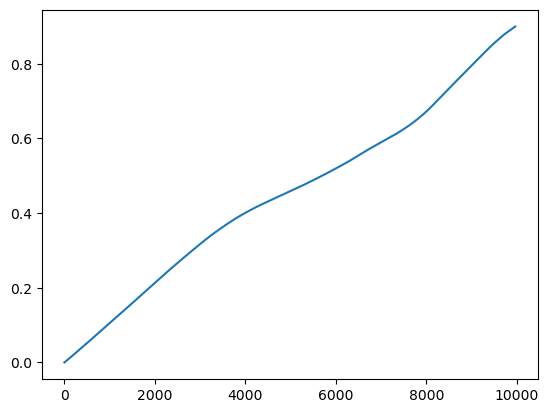

In [19]:
finding_transient(cum_mean)

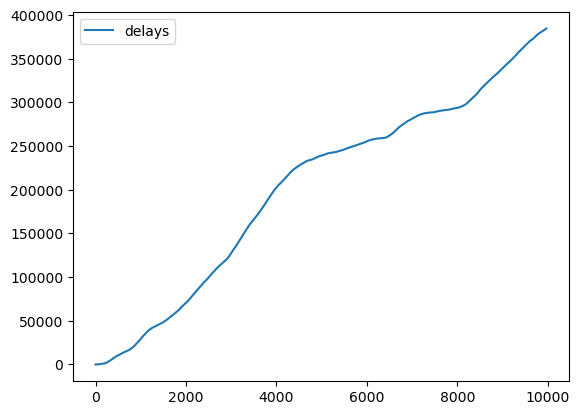

In [14]:
plt.plot(cum_mean, label='delays')
plt.legend()
plt.show()

In [7]:
#we have to find k with a heuristic method 
# we need to visualize stuff for that matter 
#we need plot the delays 

# using a code that uses lists 


# Defining functions and classes

In [8]:
def arrival(time, FES, queue):
    
    global users
    global customer
    
    # introducing random client arrival
    inter_arrival = random.expovariate(1.0/average_arrival_interval)
    #FES.put((time + inter_arrival, 'arrival'))
    FES.append((time + inter_arrival, 'arrival'))
    
    # managing the event 
    users += 1
    x = 'client ' + str(customer)
    customer += 1
    
    # recording client id and put it in the list
    client = Client(x, time)
    queue.append(client)

    print(f'{client.name} arrived at {client.arrival_time}')
    
    # start the service in case the server is idle
    if users == 1:
        # scheduling random departure time to the clients
        service_time = random.expovariate(1.0/average_service_time)
        #FES.put((time + service_time, 'departure'))
        FES.append((time + service_time, 'departure'))

def departure(time, FES, queue):
    
    global users
    
    # manipulating the list of clients to get FIFO orientation
    queue.reverse()
    client = queue.pop()
    queue.reverse()
    users -= 1
    delay = time - client.arrival_time
#     delays.append(time - client.arrival_time)
    print(f'{client.name} departured at {time}')
    
    # checking the number of clients in line
    if users > 0:
        # scheduling random departure time to the clients
        service_time = np.random.exponential(1.0/average_service_time)
        #FES.put((time + service_time, 'departure'))
        FES.append((time + service_time, 'departure'))
    
    return delay
        

# Implementing the simulation

In [9]:
# initialization of variables
time = 0
users = 0
customer = 1
queue = []
average_arrival_interval = 3
average_service_time = 6
delays=[]
#FES = PriorityQueue()
FES = []

# the first arrival at time 0
#FES.put((0,'arrival'))
FES.append((0,'arrival'))
target = 0
#turned it into a list, and then sorted it 
# the main loop to give the service to the clients until specific time
while time < 1000:
    #(time, event_type) = FES.get()
    FES = sorted(FES)
    (time, event_type) = FES[target]
    if event_type == 'arrival':
        arrival(time, FES, queue)
    elif event_type == 'departure':
        delays.append(departure(time, FES, queue))
    target += 1

AttributeError: 'Client' object has no attribute 'name'

In [ ]:
# i have to get the mean of the delays 
# then have to plot the delays as a function of k 
# then, choose a k by myself and run the simulation with different values for k 
#delays = time - client arrival

In [ ]:
delays

In [ ]:
import matplotlib.pyplot as plt
plt.plot(delays, label='delays')
plt.legend()
plt.show()

In [ ]:
# util = [0.1, 0.2, 0.4, 0.7, 0.8, 0.9, 0.95, 0.99]
# #util = e[service]/e[delay]
# # for each util we get a different k 
# #page 10 of slide 10 
# def transient(delays):
#     mean_delays=delays.mean() #first we have to compute the mean of the delays 
#     #then we have to compute Xbar k
#     #we have to choose a value for k 
#     k = 3
#     for i in range(len(delays)):
#         (1/len(delays)-k)*(sum())
    
    

In [ ]:
# we have to cosider three different scenarios 
# EXP: exponentially distributed with mean=1

# DET: deterministic =1

# HYP:  distributed according to a hyper-exponential distribution with mean=1 standard deviation=10
#FES has to be a list 